In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
from PIL import Image 
from sklearn.model_selection import  train_test_split as tts 
from typing import Dict, List
from pathlib import Path
import os


import random
#git commit


In [2]:
IMAGE_PATH = Path("files")

IMAGE_PATH_LIST = list(IMAGE_PATH.glob("*/*/*.jpg"))

print(f'Total Images = {len(IMAGE_PATH_LIST)}')


Total Images = 87


In [3]:
classes = os.listdir(IMAGE_PATH)
classes

['acne', 'bags', 'redness']

In [4]:
classes = sorted(classes)
classes

['acne', 'bags', 'redness']

In [5]:
print("**" * 20)
print(" " * 10, f"Total Classes = {len(classes)}")
print("**" * 20)


****************************************
           Total Classes = 3
****************************************


In [6]:

for c in classes:
    total_images_class = list(Path(os.path.join(IMAGE_PATH, c)).glob("*/*.jpg"))
    print(f"* {c}: {len(total_images_class)} images")

* acne: 30 images
* bags: 27 images
* redness: 30 images


C:\Users\arham\AppData\Local\Temp\ipykernel_25644\1804643052.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


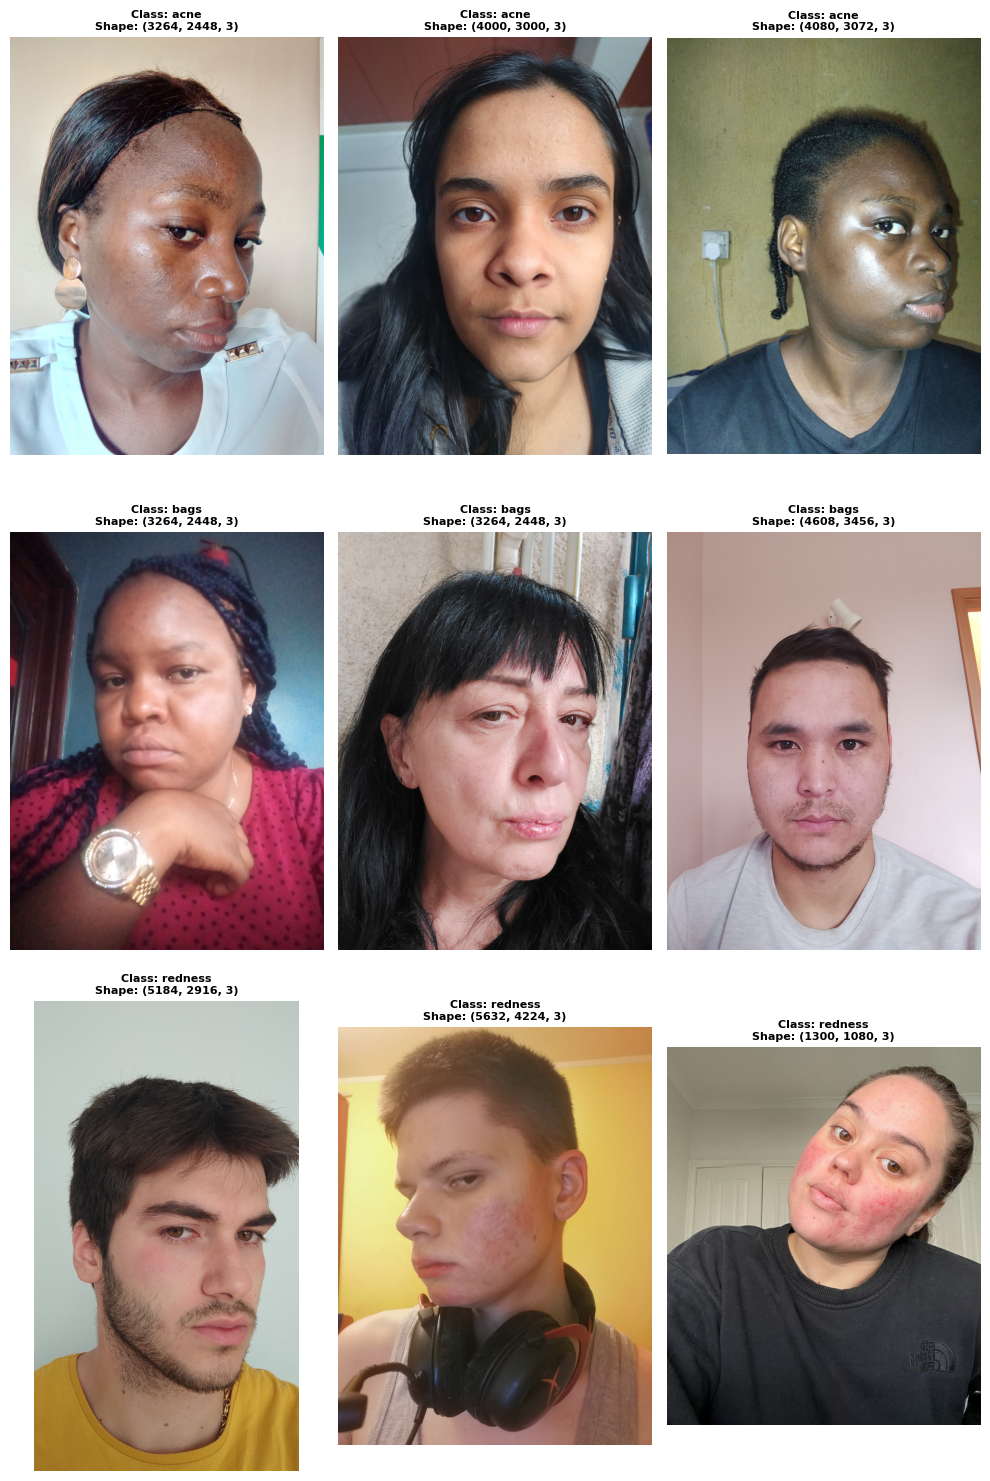

In [7]:
NUM_IMAGES = 3

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10,15))
p = 0
for c in classes:
    total_images_class = list(Path(os.path.join(IMAGE_PATH, c)).glob("*/*.jpg"))
    images_selected = random.choices(total_images_class, k = NUM_IMAGES)
    
    for i,img_path in enumerate(images_selected):
        img_bgr = cv2.imread(str(img_path))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_rgb)
        ax[p,i].axis("off")
        ax[p,i].set_title(f"Class: {c}\nShape: {img_rgb.shape}", fontsize = 8, fontweight = "bold", color = "black")
        
    p += 1
    
fig.tight_layout()
fig.show()

Total Images = 87
Classes: ['acne', 'bags', 'redness']


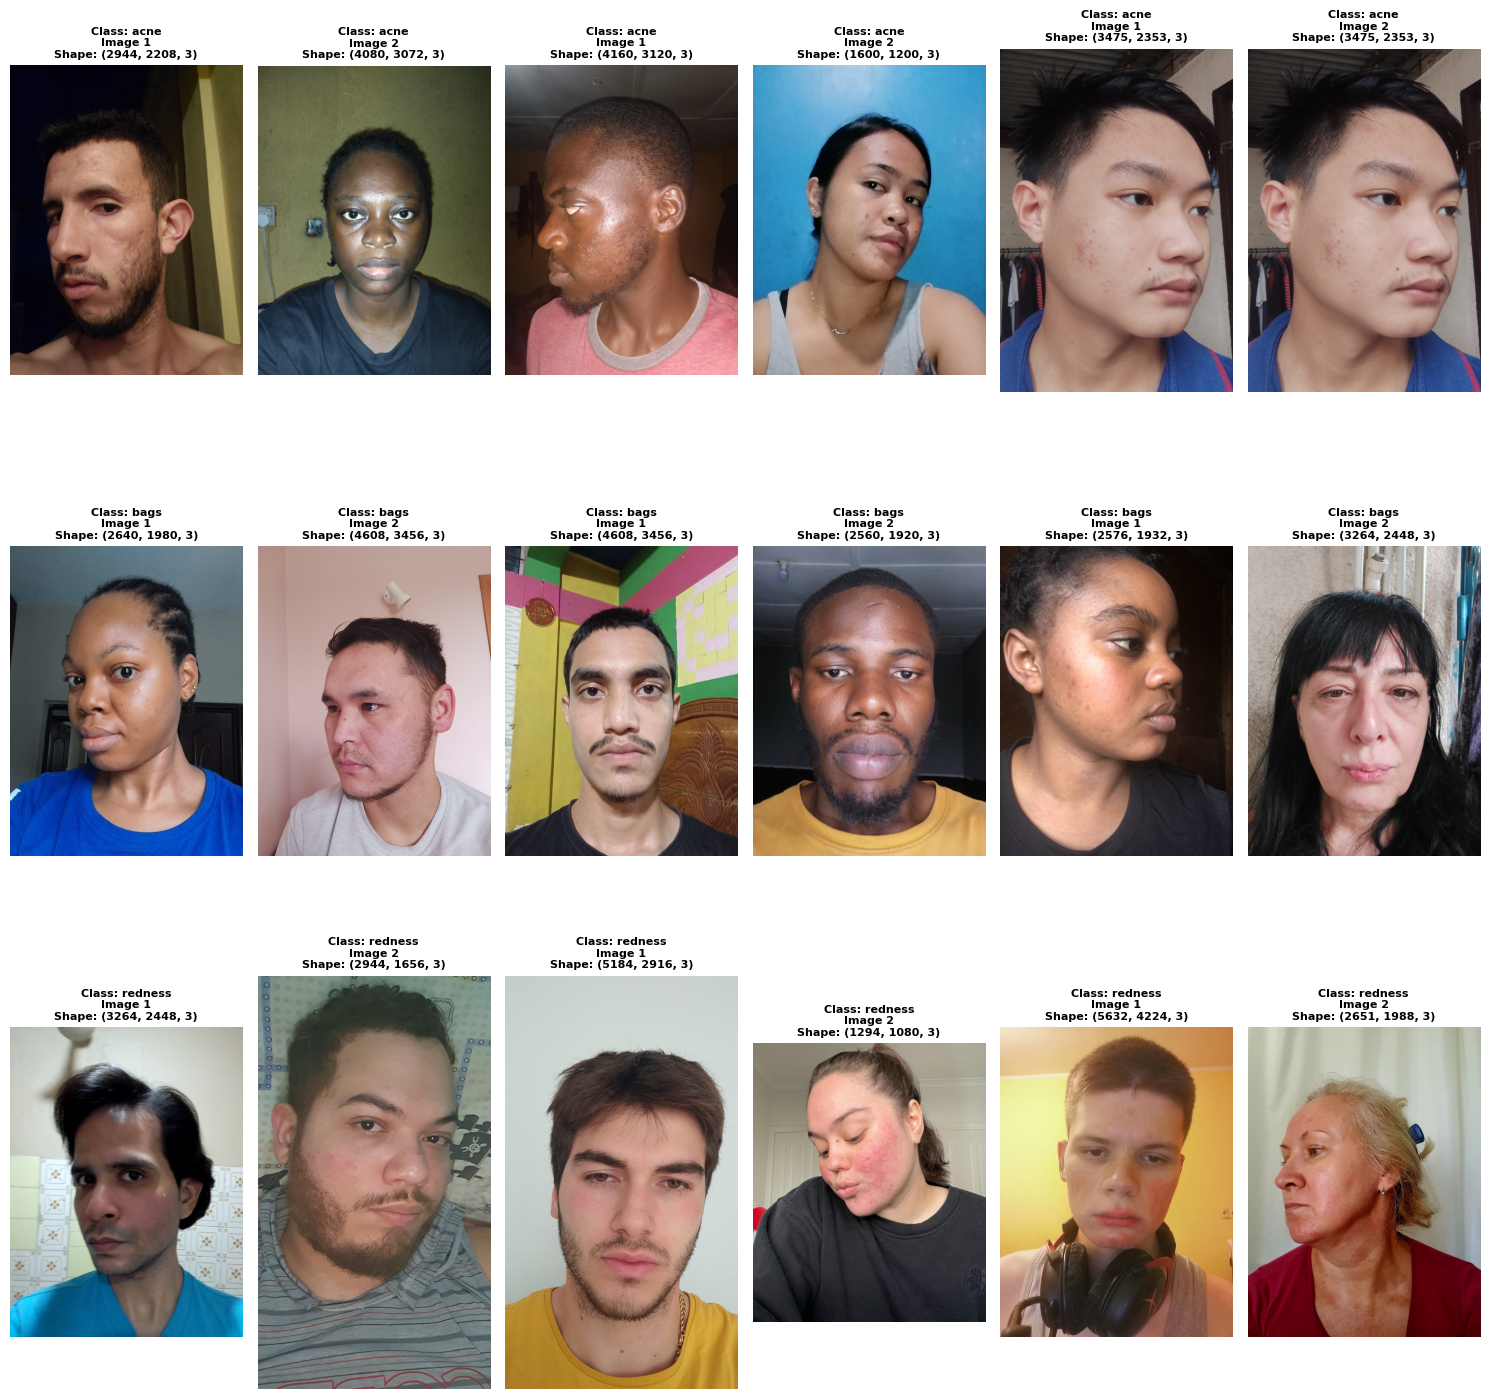

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
from pathlib import Path
import os
import random
from typing import List

# Paths and Class Setup
IMAGE_PATH = Path("files")
IMAGE_PATH_LIST = list(IMAGE_PATH.glob("*/*/*.jpg"))
classes = os.listdir(IMAGE_PATH)

print(f'Total Images = {len(IMAGE_PATH_LIST)}')
print(f'Classes: {classes}')

NUM_IMAGE_PAIRS = 3  # Number of image pairs to show per class

# Set up the plot
fig, ax = plt.subplots(nrows=len(classes), ncols=NUM_IMAGE_PAIRS * 2, figsize=(15, 15))

p = 0
for c in classes:
    # Get all images from the class
    total_images_class = list(Path(os.path.join(IMAGE_PATH, c)).glob("*/*.jpg"))
    
    # Randomly select pairs of images from the same class
    image_pairs = [(random.choice(total_images_class), random.choice(total_images_class)) for _ in range(NUM_IMAGE_PAIRS)]
    
    for i, (img_path1, img_path2) in enumerate(image_pairs):
        # Load first image in the pair
        img_bgr1 = cv2.imread(str(img_path1))
        img_rgb1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)
        
        # Load second image in the pair
        img_bgr2 = cv2.imread(str(img_path2))
        img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
        
        # Display first image
        ax[p, i * 2].imshow(img_rgb1)
        ax[p, i * 2].axis("off")
        ax[p, i * 2].set_title(f"Class: {c}\nImage 1\nShape: {img_rgb1.shape}", fontsize=8, fontweight="bold", color="black")
        
        # Display second image
        ax[p, i * 2 + 1].imshow(img_rgb2)
        ax[p, i * 2 + 1].axis("off")
        ax[p, i * 2 + 1].set_title(f"Class: {c}\nImage 2\nShape: {img_rgb2.shape}", fontsize=8, fontweight="bold", color="black")
    
    p += 1

fig.tight_layout()
plt.show()


In [10]:
import random
import cv2
from pathlib import Path

def generate_image_pairs(image_paths: List[Path], num_pairs: int = 100):
    pairs = []
    labels = []
    
    # Generate positive (similar) pairs
    for _ in range(num_pairs // 2):
        img1_path, img2_path = random.sample(image_paths, 2)
        
        # Label = 1 (improvement or similar)
        pairs.append((img1_path, img2_path))
        labels.append(1)  # Assuming this pair shows improvement

    # Generate negative (dissimilar) pairs
    for _ in range(num_pairs // 2):
        img1_path = random.choice(image_paths)
        img2_path = random.choice(image_paths)
        
        # Label = 0 (no improvement or dissimilar)
        pairs.append((img1_path, img2_path))
        labels.append(0)

    return pairs, labels

# Example Usage: Generate pairs for the 'acne' class
acne_image_paths = list(Path("files/acne").glob("*/*.jpg"))
pairs, labels = generate_image_pairs(acne_image_paths, num_pairs=100)


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
import numpy as np

# Create CNN for feature extraction
def create_base_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D()(x)
    
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D()(x)
    
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    
    model = Model(input_layer, x)
    return model

# Siamese network combining two CNNs
def build_siamese_network(input_shape):
    # Create two inputs for the pair of images
    input_1 = Input(shape=input_shape)
    input_2 = Input(shape=input_shape)
    
    # Shared CNN
    base_cnn = create_base_cnn(input_shape)
    
    # Apply the CNN to both inputs
    output_1 = base_cnn(input_1)
    output_2 = base_cnn(input_2)
    
    # Compute the L2 distance between the two outputs
    l2_distance = Lambda(lambda tensors: tf.keras.backend.abs(tensors[0] - tensors[1]))([output_1, output_2])
    
    # Pass through a fully connected layer
    output = Dense(1, activation='sigmoid')(l2_distance)
    
    # Define the model
    siamese_network = Model(inputs=[input_1, input_2], outputs=output)
    
    siamese_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return siamese_network

# Example usage
input_shape = (128, 128, 3)  # Example image shape (height, width, channels)
siamese_model = build_siamese_network(input_shape)
siamese_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_1        │ (None, 128)       │  3,304,640 │ input_layer[0][0… │
│ (Functional)        │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128)       │          0 │ functional_1[0][… │
│                     │                   │            │ functional_1[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
import numpy as np

# Create CNN for feature extraction
def create_base_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D()(x)
    
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D()(x)
    
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    
    model = Model(input_layer, x)
    return model

# Siamese network combining two CNNs
def build_siamese_network(input_shape):
    # Create two inputs for the pair of images
    input_1 = Input(shape=input_shape)
    input_2 = Input(shape=input_shape)
    
    # Shared CNN
    base_cnn = create_base_cnn(input_shape)
    
    # Apply the CNN to both inputs
    output_1 = base_cnn(input_1)
    output_2 = base_cnn(input_2)
    
    # Compute the L2 distance between the two outputs
    l2_distance = Lambda(lambda tensors: tf.keras.backend.abs(tensors[0] - tensors[1]))([output_1, output_2])
    
    # Pass through a fully connected layer
    output = Dense(1, activation='sigmoid')(l2_distance)
    
    # Define the model
    siamese_network = Model(inputs=[input_1, input_2], outputs=output)
    
    siamese_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return siamese_network

# Example usage
input_shape = (128, 128, 3)  # Example image shape (height, width, channels)
siamese_model = build_siamese_network(input_shape)
siamese_model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_5        │ (None, 128)       │  3,304,640 │ input_layer_3[0]… │
│ (Functional)        │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 128)       │          0 │ functional_5[0][… │
│                     │                   │            │ functional_5[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        129 │ lambda_1[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_and_preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Prepare the image pairs and labels
def prepare_data(pairs, labels, target_size=(128, 128)):
    X1, X2, y = [], [], []
    
    for (img1_path, img2_path), label in zip(pairs, labels):
        img1 = load_and_preprocess_image(img1_path, target_size)
        img2 = load_and_preprocess_image(img2_path, target_size)
        
        X1.append(img1)
        X2.append(img2)
        y.append(label)
    
    return np.array(X1), np.array(X2), np.array(y)

# Prepare training data
X1, X2, y = prepare_data(pairs, labels)

# Train the Siamese network
siamese_model.fit([X1, X2], y, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.5906 - loss: 0.7172 - val_accuracy: 0.0000e+00 - val_loss: 0.7878
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.5729 - loss: 0.6573 - val_accuracy: 0.0000e+00 - val_loss: 1.0639
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.6311 - loss: 0.5881 - val_accuracy: 0.0000e+00 - val_loss: 1.1130
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.6389 - loss: 0.5366 - val_accuracy: 0.0000e+00 - val_loss: 1.2740
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.7490 - loss: 0.4548 - val_accuracy: 0.0500 - val_loss: 1.5504
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.8319 - loss: 0.3832 - val_accuracy: 0.1000 - val_loss: 1.7836
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 670ms/step - accuracy: 0.9543 - loss: 0.2346 - val_accuracy: 0.2000 - val_loss: 2.0843
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step - accuracy: 0.9078 - loss: 0.2151 - val_accuracy: 0.

In [14]:
# Generate test pairs (you can specify the number of pairs you want to test)
test_acne_image_paths = list(Path("files/acne").glob("*/*.jpg"))
test_pairs, test_labels = generate_image_pairs(test_acne_image_paths, num_pairs=20)  # 20 test pairs


In [15]:
# Prepare the test data (same function used as in training)
X1_test, X2_test, y_test = prepare_data(test_pairs, test_labels)


In [16]:
# Predict on test data
predictions = siamese_model.predict([X1_test, X2_test])

# Convert predictions to binary (improvement/no improvement)
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]

# Print results
for i, (pred, true_label) in enumerate(zip(binary_predictions, y_test)):
    print(f"Test Pair {i+1}: Predicted = {pred}, True = {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Test Pair 1: Predicted = 1, True = 1
Test Pair 2: Predicted = 1, True = 1
Test Pair 3: Predicted = 1, True = 1
Test Pair 4: Predicted = 1, True = 1
Test Pair 5: Predicted = 1, True = 1
Test Pair 6: Predicted = 1, True = 1
Test Pair 7: Predicted = 1, True = 1
Test Pair 8: Predicted = 1, True = 1
Test Pair 9: Predicted = 1, True = 1
Test Pair 10: Predicted = 1, True = 1
Test Pair 11: Predicted = 1, True = 0
Test Pair 12: Predicted = 0, True = 0
Test Pair 13: Predicted = 1, True = 0
Test Pair 14: Predicted = 0, True = 0
Test Pair 15: Predicted = 0, True = 0
Test Pair 16: Predicted = 0, True = 0
Test Pair 17: Predicted = 1, True = 0
Test Pair 18: Predicted = 1, True = 0
Test Pair 19: Predicted = 1, True = 0
Test Pair 20: Predicted = 1, True = 0


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=len(test_pairs), ncols=2, figsize=(10, len(test_pairs) * 3))

for i, (img1_path, img2_path) in enumerate(test_pairs):
    # Load and display first image
    img1 = load_and_preprocess_image(img1_path, target_size=(128, 128))
    ax[i, 0].imshow(img1)
    ax[i, 0].axis("off")
    ax[i, 0].set_title(f"Image 1 (Pair {i+1})")
    
    # Load and display second image
    img2 = load_and_preprocess_image(img2_path, target_size=(128, 128))
    ax[i, 1].imshow(img2)
    ax[i, 1].axis("off")
    ax[i, 1].set_title(f"Image 2 (Pred: {binary_predictions[i]}, True: {y_test[i]})")

plt.tight_layout()
plt.show()


In [19]:
# Paths to your two skin images
image_path_1 = "1.jpg"
image_path_2 = "2.jpg"


In [22]:
# Preprocess the two images
img1 = load_and_preprocess_image(image_path_1, target_size=(128, 128))
img2 = load_and_preprocess_image(image_path_2, target_size=(128, 128))

# Reshape to match the model's input shape (add a batch dimension)
img1 = np.expand_dims(img1, axis=0)
img2 = np.expand_dims(img2, axis=0)



In [23]:
# Predict similarity/improvement
prediction = siamese_model.predict([img1, img2])

# Convert prediction to binary (1: improvement, 0: no improvement)
binary_prediction = 1 if prediction >= 0.5 else 0

print(f"Prediction: {binary_prediction} (1 = Improvement, 0 = No Improvement)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: 1 (1 = Improvement, 0 = No Improvement)
